### TFIDF - KNN

In [ ]:
# Count the number of projects that is Big data related
df_bigdata = df_merge[df_merge['Prediction_KNN']=='Big-data']
print('Number of abstracts related to Big data:', len(df_bigdata))

/tmp/ipykernel_78861/234042915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bigdata["FY"] = df_bigdata["FY"].astype('int')
/tmp/ipykernel_78861/234042915.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


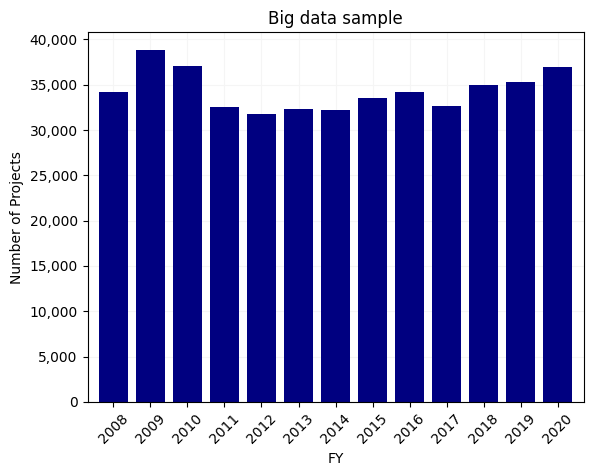

In [27]:
# Distribution over time and agencies
df_bigdata["FY"] = df_bigdata["FY"].astype('int')
year_counts = df_bigdata['FY'].value_counts().sort_index(ascending=True)

# Distribution
year = year_counts.index.tolist()
count = year_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(year, count, color='navy')
#plt.xlim(-0.7, len(year)-0.3)
plt2.xlim(2007.3,2020.7)
plt2.xticks(year, rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt2.xlabel("FY")
plt2.ylabel("Number of Projects")
plt2.title("Big data sample")

plt2.savefig("big_data_time.png", dpi = 800, bbox_inches = "tight")

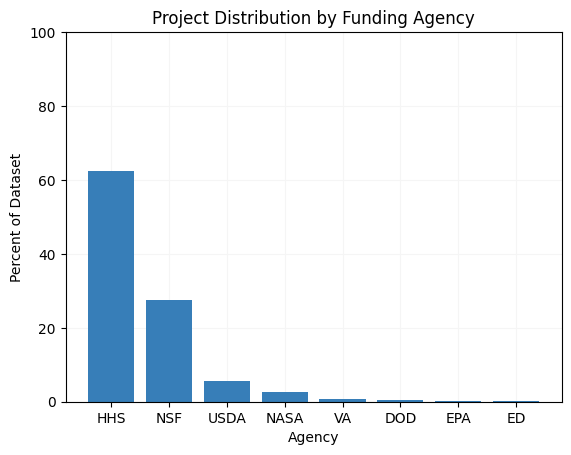

In [28]:
agency_counts = 100*df_bigdata["DEPARTMENT"].value_counts()/len(df_bigdata)
agency = agency_counts.index.tolist()
count = agency_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(agency, count, color='navy')
plt2.ylim(0,100)
plt2.xlabel("Agency")
plt2.ylabel("Percent of Dataset")
plt2.title("Project Distribution by Funding Agency")

plt2.savefig("big_data_agency.png", dpi = 800, bbox_inches = "tight")

#### SVM

In [35]:
# Cross comparision between SVM and KNN
pd.crosstab(df_merge['Prediction_KNN'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_KNN,,,
Big-data,25368,421333,446701
Non Big-data,88,697080,697168
Total,25456,1118413,1143869


### Decision Tree

In [41]:
# Cross comparision between NN and SVM
pd.crosstab(df_merge['Prediction_DT'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_DT,,,
Big-data,18697,117824,136521
Non Big-data,6759,1000589,1007348
Total,25456,1118413,1143869


In [42]:
# Cross comparision between NN and KNN
pd.crosstab(df_merge['Prediction_DT'], df_merge['Prediction_KNN'], margins=True, margins_name="Total")

Prediction_KNN,Big-data,Non Big-data,Total
Prediction_DT,,,
Big-data,87681,48840,136521
Non Big-data,359020,648328,1007348
Total,446701,697168,1143869


### Random Forest

In [48]:
# Cross comparision between RF and DT
pd.crosstab(df_merge['Prediction_RF'], df_merge['Prediction_DT'], margins=True, margins_name="Total")

Prediction_DT,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,27126,36219,63345
Non Big-data,109395,971129,1080524
Total,136521,1007348,1143869


In [49]:
# Cross comparision between RF and SVM
pd.crosstab(df_merge['Prediction_RF'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,18586,44759,63345
Non Big-data,6870,1073654,1080524
Total,25456,1118413,1143869


In [67]:
# Cross comparision between RF and SVM
pd.crosstab(df_merge['Prediction_RF'], df_merge['Prediction_KNN'], margins=True, margins_name="Total")

Prediction_KNN,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,33750,2183,35933
Non Big-data,336756,771180,1107936
Total,370506,773363,1143869


#### Neural Network

In [ ]:
# Cross comparision between NN and KNN
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_KNN'], margins=True, margins_name="Total")

In [ ]:
# Cross comparision between NN and SVM
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

In [ ]:
# Cross comparision between NN and DT
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_DT'], margins=True, margins_name="Total")

In [ ]:
# Cross comparision between NN and RF
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_RF'], margins=True, margins_name="Total")

## 1.7. Decision rule based on all classifiers

In [ ]:
# Compute a score to be identify as big data
df_merge = pd.read_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/FR_final_predicted.csv")
df_merge['score'] = np.where(df_merge['Prediction_KNN'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_SVM'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_DT'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_RF'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_NN'].str.contains("Non Big-data"), 0, 1)

In [ ]:
df_merge.head()

In [ ]:
# Distribution of abstracts
df_merge['score'].value_counts()

In [ ]:
# Used a rule (majority votes from classifiers) to identify Big-data abstracts. Useful because we have an impair number of classifier
df_merge['Big_data'] = 0
df_merge.loc[df_merge['score']>3,'Big_data'] = 1
df_merge['Big_data'].value_counts()

In [ ]:
# subset the data to big-data and save
df_bigdata = df_merge[df_merge['Big_data']==1]
df_bigdata.to_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/abstracts_classification_big_data.csv")

## Descriptive statistics of our Big data

In [ ]:
# Distribution over time and agencies
df_bigdata["FY"] = df_bigdata["FY"].astype('int')
year_counts = df_bigdata['FY'].value_counts().sort_index(ascending=True)

# Distribution
year = year_counts.index.tolist()
count = year_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(year, count, color='navy')
#plt.xlim(-0.7, len(year)-0.3)
plt2.xlim(2007.3,2020.7)
plt2.xticks(year, rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt2.xlabel("FY")
plt2.ylabel("Number of Projects")
plt2.title("Big Data Sample Over Time \n TFIDF \n")

plt2.savefig("tfidf_big_data_time.png", dpi = 800, bbox_inches = "tight")

In [ ]:
agency_counts = 100*df_bigdata["DEPARTMENT"].value_counts()/len(df_bigdata)
agency = agency_counts.index.tolist()
count = agency_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(agency, count, color=cb_pal['blue'])
plt2.ylim(0,100)
plt2.xlabel("Agency")
plt2.ylabel("Percent of Dataset")
plt2.title("Project Distribution by Funding Agency \n TFIDF \n")

plt2.savefig("tfidf_big_data_agency.png", dpi = 800, bbox_inches = "tight")